## Chapter 2: Introductory examples

### 1. USAGov Data From bit.ly

In [1]:
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'

In [2]:
open(path).readline()

import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
records = [json.loads(line) for line in open(path)]

In [3]:
records[0]

{u'a': u'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 u'al': u'en-US,en;q=0.8',
 u'c': u'US',
 u'cy': u'Danvers',
 u'g': u'A6qOVH',
 u'gr': u'MA',
 u'h': u'wfLQtf',
 u'hc': 1331822918,
 u'hh': u'1.usa.gov',
 u'l': u'orofrog',
 u'll': [42.576698, -70.954903],
 u'nk': 1,
 u'r': u'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 u't': 1331923247,
 u'tz': u'America/New_York',
 u'u': u'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [4]:
records[0]['tz']

u'America/New_York'

In [5]:
print (records[0]['tz'])

America/New_York


### Counting Time Zones in pure Python

In [6]:
timezones = [rec['tz'] for rec in records]

KeyError: 'tz'

In [7]:
print (rec['tz'] for rec in records)

<generator object <genexpr> at 0x1098b13c0>


In [8]:
timezones = [rec['tz'] for rec in records if 'tz' in rec]

In [9]:
timezones[:10]

[u'America/New_York',
 u'America/Denver',
 u'America/New_York',
 u'America/Sao_Paulo',
 u'America/New_York',
 u'America/New_York',
 u'Europe/Warsaw',
 u'',
 u'',
 u'']

In [10]:
def get_counts(sequences):
    count = {}
    for i in sequences:
        if x in count:
            count[x] += 1
        else:
            count[x] = 1
    return count

In [11]:
from collections import defaultdict

def get_counts(sequences):
    count = defaultdict(int)
    for x in count:
        count[x] += 1
    return count

In [12]:
counts = get_counts(timezones)

In [17]:
print counts

defaultdict(<type 'int'>, {'America/New_York': 0})


In [13]:
counts['America/New_York']

0

In [14]:
len(timezones)

3440

In [15]:
def top_counts(count_dict, n = 10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n: ]

In [16]:
top_counts(counts)

[(0, 'America/New_York')]

In [18]:
from collections import Counter

In [19]:
counts = Counter(timezones)

In [20]:
counts.most_common(10)

[(u'America/New_York', 1251),
 (u'', 521),
 (u'America/Chicago', 400),
 (u'America/Los_Angeles', 382),
 (u'America/Denver', 191),
 (u'Europe/London', 74),
 (u'Asia/Tokyo', 37),
 (u'Pacific/Honolulu', 36),
 (u'Europe/Madrid', 35),
 (u'America/Sao_Paulo', 33)]

### Counting Time Zones with Pandas

In [22]:
% matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [24]:
from __future__ import division
from numpy.random import randn
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('figure', figsize = (10, 6))
np.set_printoptions(precision = 4)

In [25]:
import json
path = 'ch02/usagov_bitly_data2012-03-16-1331923249.txt'
lines = open(path).readlines()
records = [json.loads(line) for line in lines]

In [26]:
from pandas import DataFrame, Series
import pandas as pd

frame = DataFrame(records)

In [27]:
frame.head()

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1331822918,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1331923247,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1308262393,j.mp,NaN,bitly,"[40.218102, -111.613297]",0,http://www.AwareMap.com/,1331923249,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1331919941,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1,http://t.co/03elZC4Q,1331923250,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1331923068,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0,direct,1331923249,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1273672411,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0,http://www.shrewsbury-ma.gov/selco/,1331923251,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...


In [28]:
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [29]:
tz_counts = frame['tz'].value_counts()
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [30]:
clean_tz = frame['tz'].fillna('Missing')
clean_tz[clean_tz == ''] = 'Unknown'
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [31]:
plt.figure(figsize = (10, 4))

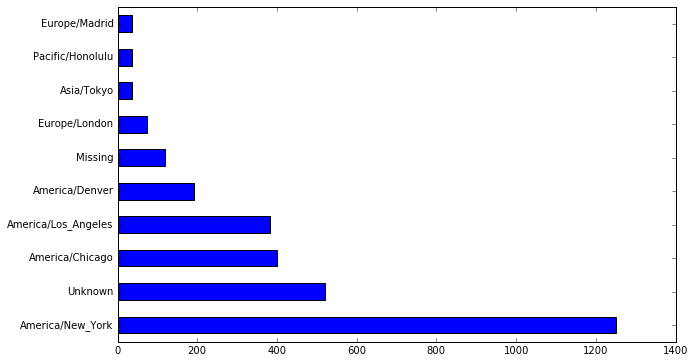

In [32]:
tz_counts[:10].plot(kind = 'barh', rot = 0)

In [33]:
frame['a'][1]

u'GoogleMaps/RochesterNY'

In [34]:
frame['a'][50]

u'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [35]:
frame['a'][51]

u'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P925/V10e Build/FRG83G) AppleWebKit/533.1 (KHTML, like Gecko) Version/4.0 Mobile Safari/533.1'

In [36]:
results = Series([x.split()[0] for x in frame.a.dropna()])
results[:5]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [37]:
results.value_counts()[:8]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
dtype: int64

In [65]:
cframe = frame[frame.a.notnull()]

In [66]:
operating_system = np.where(cframe['a'].str.contains('Windows'), 'Windows', 'Not Windows')
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='|S11')

In [69]:
by_tz_os = cframe.groupby(['tz', operating_system])

In [70]:
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts[:10]

,Not Windows,Windows
tz,,
,245,276
Africa/Cairo,0,3
Africa/Casablanca,0,1
Africa/Ceuta,0,2
Africa/Johannesburg,0,1
Africa/Lusaka,0,1
America/Anchorage,4,1
America/Argentina/Buenos_Aires,1,0
America/Argentina/Cordoba,0,1


In [71]:
# use to sort ascending order
indexer = agg_counts.sum(1).argsort()
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [72]:
count_subset = agg_counts.take(indexer)[-10:]
count_subset

,Not Windows,Windows
tz,,
America/Sao_Paulo,13,20
Europe/Madrid,16,19
Pacific/Honolulu,0,36
Asia/Tokyo,2,35
Europe/London,43,31
America/Denver,132,59
America/Los_Angeles,130,252
America/Chicago,115,285
,245,276


In [73]:
plt.figure()

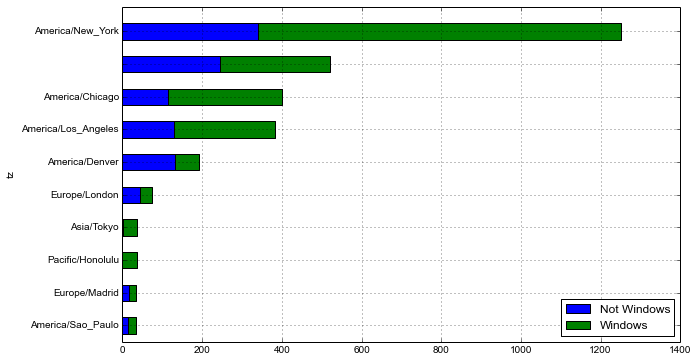

In [74]:
count_subset.plot(kind = 'barh', stacked = True)

In [75]:
plt.figure()

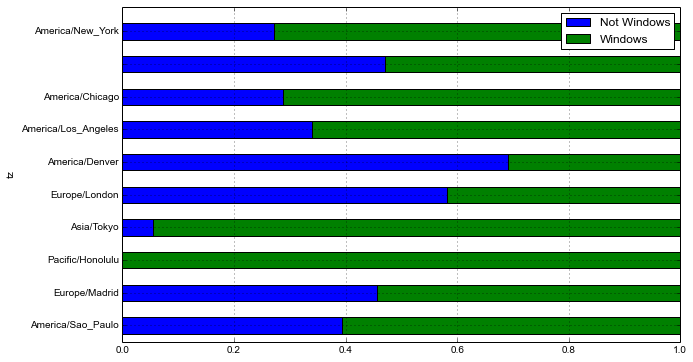

In [76]:
normed_subset = count_subset.div(count_subset.sum(1), axis = 0)
normed_subset.plot(kind = 'barh', stacked = True)

###MovieLens 1M Data Set

In [77]:
import pandas as pd
encoding = 'latin1'

upath = os.path.expanduser('ch02/movielens/users.dat')
rpath = os.path.expanduser('ch02/movielens/ratings.dat')
mpath = os.path.expanduser('ch02/movielens/movies.dat')

unames = ['user_id', 'gender', 'age', 'accupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pd.read_csv(upath, sep = '::', header = None, names = unames, encoding = encoding)
ratings = pd.read_csv(rpath, sep = '::', header = None, names = rnames, encoding = encoding)
movies = pd.read_csv(mpath, sep = '::', header = None, names = mnames, encoding = encoding)

In [78]:
users[:5]

,user_id,gender,age,accupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [79]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [80]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [81]:
ratings

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
5,1,1197,3,978302268
6,1,1287,5,978302039
7,1,2804,5,978300719
8,1,594,4,978302268
9,1,919,4,978301368


In [82]:
data = pd.merge(pd.merge(ratings, users), movies)
data

,user_id,movie_id,rating,timestamp,gender,age,accupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
5,18,1193,4,978156168,F,18,3,95825,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
7,24,1193,5,978136709,F,25,7,10023,One Flew Over the Cuckoo's Nest (1975),Drama
8,28,1193,3,978125194,F,25,1,14607,One Flew Over the Cuckoo's Nest (1975),Drama
9,33,1193,5,978557765,M,45,3,55421,One Flew Over the Cuckoo's Nest (1975),Drama


In [83]:
data.ix[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
accupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

In [86]:
mean_rating = data.pivot_table('rating', rows = 'title', cols = 'gender', aggfunc = 'mean')
mean_rating[:10]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
1-900 (1994),2.000000,3.000000
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215


In [87]:
rating_by_title = data.groupby('title').size()

In [88]:
rating_by_title[0:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [89]:
active_titles = rating_by_title.index[rating_by_title >= 250]
active_titles[:10]

Index([u''burbs, The (1989)', u'10 Things I Hate About You (1999)', u'101 Dalmatians (1961)', u'101 Dalmatians (1996)', u'12 Angry Men (1957)', u'13th Warrior, The (1999)', u'2 Days in the Valley (1996)', u'20,000 Leagues Under the Sea (1954)', u'2001: A Space Odyssey (1968)', u'2010 (1984)'], dtype='object')

In [90]:
mean_rating = mean_rating.ix[active_titles]
mean_rating

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [91]:
mean_rating = mean_rating.rename(index = {'Seven Samurai (The Magnificent Seven) (Shichinin no samurai) (1954)':
                                          'Seven Samurai (Shichinin no samurai)(1954)'})                                          

In [93]:
top_female_rating = mean_rating.sort_index(by = 'F', ascending = False)
top_female_rating[:10]                                            

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


### Measure rating disaggreement

In [94]:
mean_rating['diff'] = mean_rating['M'] - mean_rating['F']

In [95]:
sorted_by_diff = mean_rating.sort_index(by = 'diff')

In [96]:
sorted_by_diff[:15]

gender,F,M,diff
title,,,
Dirty Dancing (1987),3.790378,2.959596,-0.830782
Jumpin' Jack Flash (1986),3.254717,2.578358,-0.676359
Grease (1978),3.975265,3.367041,-0.608224
Little Women (1994),3.870588,3.321739,-0.548849
Steel Magnolias (1989),3.901734,3.365957,-0.535777
Anastasia (1997),3.800000,3.281609,-0.518391
"Rocky Horror Picture Show, The (1975)",3.673016,3.160131,-0.512885
"Color Purple, The (1985)",4.158192,3.659341,-0.498851
"Age of Innocence, The (1993)",3.827068,3.339506,-0.487561


In [97]:
# Reverse order of rows, taking first 15 rows
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
"Good, The Bad and The Ugly, The (1966)",3.494949,4.221300,0.726351
"Kentucky Fried Movie, The (1977)",2.878788,3.555147,0.676359
Dumb & Dumber (1994),2.697987,3.336595,0.638608
"Longest Day, The (1962)",3.411765,4.031447,0.619682
"Cable Guy, The (1996)",2.250000,2.863787,0.613787
Evil Dead II (Dead By Dawn) (1987),3.297297,3.909283,0.611985
"Hidden, The (1987)",3.137931,3.745098,0.607167
Rocky III (1982),2.361702,2.943503,0.581801
Caddyshack (1980),3.396135,3.969737,0.573602


In [98]:
# Standard deviation of rating grouped by title
rating_sd_by_title = data.groupby('title')['rating'].std()

In [99]:
# Filter down to active titles
rating_sd_by_title = rating_sd_by_title.ix[active_titles]

In [100]:
# Order series by values in ascending order
rating_sd_by_title.order(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

### US baby name

In [103]:
from __future__ import division
from numpy.random import randn
import numpy as np
import matplotlib.pylab as plt
plt.rc('figure', figsize = (12, 5))
np.set_printoptions(precision = 4)

http://www.ssa.gov/oact/babynames/limits.html

In [106]:
import pandas as pd
names1880 = pd.read_csv('ch02/names/yob1880.txt', names = ['names', 'sex', 'births'])
names1880

,names,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [107]:
names1880.groupby('sex').births.sum()

sex
F       90993
M      110493
Name: births, dtype: int64

In [111]:
# year 2010 is the last year available right now
years = range(1880, 2011)

pieces = []
columns = ['names', 'sex', 'births']

for year in years:
    path = 'ch02/names/yob%d.txt' %year
    frame = pd.read_csv(path, names = columns)
    frame['year'] = year
    pieces.append(frame)
    
# concatenate them into a single dataframe
names = pd.concat(pieces, ignore_index = True)

In [112]:
# names = pd.read_pickle('ch02/all_names')

IOError: [Errno 2] No such file or directory: 'ch02/all_names'

In [114]:
total_births = names.pivot_table('births', rows = 'year', cols = 'sex', aggfunc = sum)
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


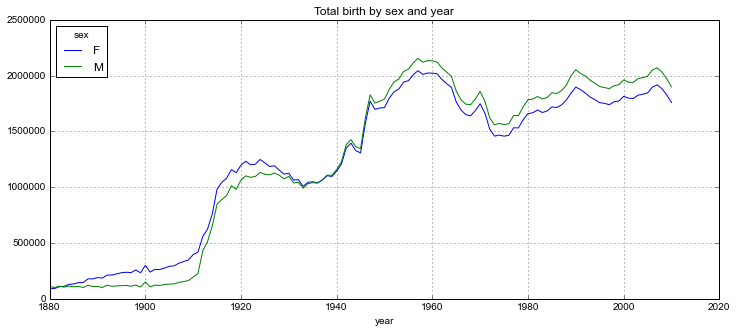

In [115]:
total_births.plot(title = 'Total birth by sex and year')

In [117]:
def add_prop(group):
    # integers division floors
    births = group.births.astype(float)
    group['prop'] = births/births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prop)
names

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [119]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [120]:
def get_top1000(group):
    return group.sort_index(by = 'births', ascending = False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [122]:
pieces = []

for year, group in names.groupby(['year', 'sex']):
    pieces.append(group.sort_index(by = 'births', ascending = False)[:1000])
top1000 = pd.concat(pieces, ignore_index = True)

In [123]:
top1000.index = np.arange(len(top1000))
top1000

,names,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


### Analyzing naming trends

In [124]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']

In [126]:
total_births = top1000.pivot_table('births', rows = 'year', cols = 'names', aggfunc = sum)

In [127]:
total_births

names  Aaden  Aaliyah  Aarav  Aaron  Aarush  Ab  Abagail  Abb  Abbey  Abbie  \
year                                                                          
1880     NaN      NaN    NaN    102     NaN NaN      NaN  NaN    NaN     71   
1881     NaN      NaN    NaN     94     NaN NaN      NaN  NaN    NaN     81   
1882     NaN      NaN    NaN     85     NaN NaN      NaN  NaN    NaN     80   
1883     NaN      NaN    NaN    105     NaN NaN      NaN  NaN    NaN     79   
1884     NaN      NaN    NaN     97     NaN NaN      NaN  NaN    NaN     98   
1885     NaN      NaN    NaN     88     NaN   6      NaN  NaN    NaN     88   
1886     NaN      NaN    NaN     86     NaN NaN      NaN  NaN    NaN     84   
1887     NaN      NaN    NaN     78     NaN NaN      NaN  NaN    NaN    104   
1888     NaN      NaN    NaN     90     NaN NaN      NaN  NaN    NaN    137   
1889     NaN      NaN    NaN     85     NaN NaN      NaN  NaN    NaN    107   
1890     NaN      NaN    NaN     96     NaN NaN      NaN    6    NaN    140   
1891     NaN      NaN    NaN     69     NaN NaN      NaN  NaN    NaN    124   
1892     NaN      NaN    NaN     95     NaN NaN      NaN  NaN    NaN    119   
1893     NaN      NaN    NaN     81     NaN NaN      NaN  NaN    NaN    115   
1894     NaN      NaN    NaN     79     NaN NaN      NaN  NaN    NaN    118   
1895     NaN      NaN    NaN     94     NaN NaN      NaN  NaN    NaN     92   
1896     NaN      NaN    NaN     69     NaN NaN      NaN  NaN    NaN    121   
1897     NaN      NaN    NaN     87     NaN NaN      NaN  NaN    NaN     97   
1898     NaN      NaN    NaN     89     NaN NaN      NaN  NaN    NaN    120   
1899     NaN      NaN    NaN     71     NaN NaN      NaN  NaN    NaN     87   
1900     NaN      NaN    NaN    104     NaN NaN      NaN  NaN    NaN    112   
1901     NaN      NaN    NaN     80     NaN NaN      NaN  NaN    NaN     87   
1902     NaN      NaN    NaN     78     NaN NaN      NaN  NaN    NaN     91   
1903     NaN      NaN    NaN     93     NaN NaN      NaN  NaN    NaN     91   
1904     NaN      NaN    NaN    117     NaN NaN      NaN  NaN    NaN     80   
1905     NaN      NaN    NaN     96     NaN NaN      NaN  NaN    NaN     73   
1906     NaN      NaN    NaN     96     NaN NaN      NaN  NaN    NaN     72   
1907     NaN      NaN    NaN    130     NaN NaN      NaN  NaN    NaN     79   
1908     NaN      NaN    NaN    114     NaN NaN      NaN  NaN    NaN     84   
1909     NaN      NaN    NaN    142     NaN NaN      NaN  NaN    NaN     57   
1910     NaN      NaN    NaN    145     NaN NaN      NaN  NaN    NaN     79   
1911     NaN      NaN    NaN    187     NaN NaN      NaN  NaN    NaN     77   
1912     NaN      NaN    NaN    303     NaN NaN      NaN  NaN    NaN     90   
1913     NaN      NaN    NaN    417     NaN NaN      NaN  NaN    NaN    121   
1914     NaN      NaN    NaN    485     NaN NaN      NaN  NaN    NaN     99   
1915     NaN      NaN    NaN    553     NaN NaN      NaN  NaN    NaN    124   
1916     NaN      NaN    NaN    584     NaN NaN      NaN  NaN    NaN    146   
1917     NaN      NaN    NaN    597     NaN NaN      NaN  NaN    NaN    136   
1918     NaN      NaN    NaN    656     NaN NaN      NaN  NaN    NaN    120   
1919     NaN      NaN    NaN    645     NaN NaN      NaN  NaN    NaN    147   
1920     NaN      NaN    NaN    668     NaN NaN      NaN  NaN    NaN     98   
1921     NaN      NaN    NaN    696     NaN NaN      NaN  NaN    NaN    134   
1922     NaN      NaN    NaN    700     NaN NaN      NaN  NaN    NaN    142   
1923     NaN      NaN    NaN    616     NaN NaN      NaN  NaN    NaN    129   
1924     NaN      NaN    NaN    683     NaN NaN      NaN  NaN    NaN     96   
1925     NaN      NaN    NaN    644     NaN NaN      NaN  NaN    NaN    128   
1926     NaN      NaN    NaN    593     NaN NaN      NaN  NaN    NaN    105   
1927     NaN      NaN    NaN    546     NaN NaN      NaN  NaN    NaN    103   
1928     NaN      NaN    NaN    557     NaN NaN   

array([<matplotlib.axes.AxesSubplot object at 0x7fb873f6c210>,
       <matplotlib.axes.AxesSubplot object at 0x7fb87141aad0>], dtype=object)

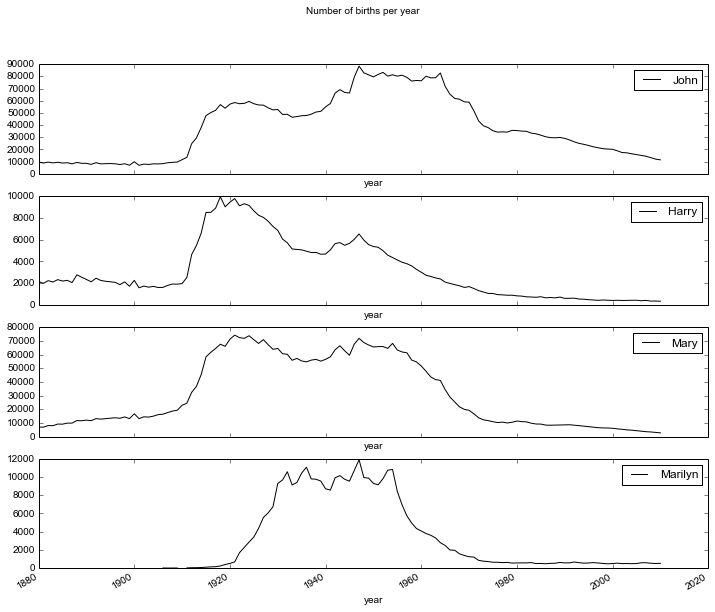

In [128]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots = True, figsize = (12, 10), grid = False, title = 'Number of births per year')

### Measure the increase of naming density

In [129]:
plt.figure()

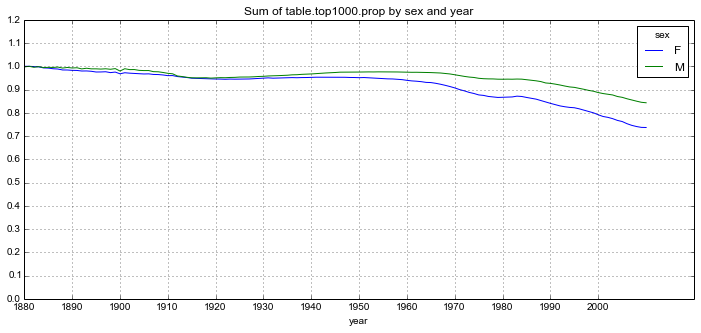

In [131]:
table = top1000.pivot_table('prop', rows = 'year', cols = 'sex', aggfunc = sum)
table.plot(title = 'Sum of table.top1000.prop by sex and year', 
           yticks = np.linspace(0, 1.2, 13),
           xticks = range(1880, 2010, 10))

In [132]:
df = boys[boys.year == 2010]
df

,names,sex,births,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


In [133]:
prop_cumsum = df.sort_index(by = 'prop', ascending = False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [135]:
prop_cumsum.values.searchsorted(0.5)

116

In [138]:
df = boys[boys.year == 1900]
in1900 = df.sort_index(by = 'prop', ascending = False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

In [140]:
def get_quantile_count(group, q = 0.5):
    group = group.sort_index(by = 'prop', ascending = False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


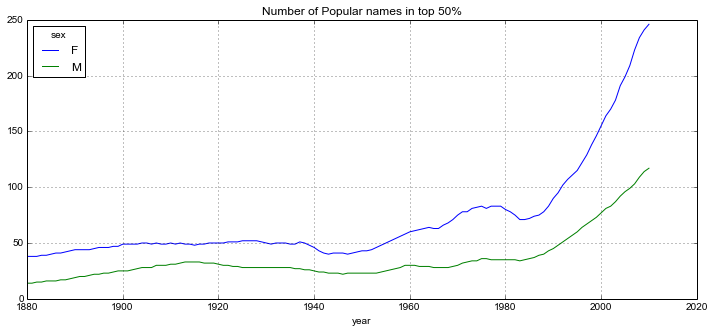

In [141]:
diversity.plot(title = 'Number of Popular names in top 50%')

### The last letter revolution

In [145]:
# Extract the last letter from the names
get_last_letter = lambda x: x[-1]

last_letters = names.names.apply(get_last_letter)
last_letters.names = 'last_letter'

table = names.pivot_table('births', rows = last_letters, cols = ['sex', 'year'], aggfunc=sum)

In [147]:
subtable = table.reindex(colums = [1910, 1960, 2010], levels = 'year')
subtable.head()

sex        F                                                                 \
year    1880   1881   1882   1883   1884   1885   1886   1887   1888   1889   
names                                                                         
a      31446  31581  36536  38330  43680  45408  49100  48942  59442  58631   
b        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c        NaN    NaN      5      5    NaN    NaN    NaN    NaN    NaN    NaN   
d        609    607    734    810    916    862   1007   1027   1298   1374   
e      33378  34080  40399  41914  48089  49616  53884  54353  66750  66663   

sex                                                                          \
year    1890   1891   1892   1893   1894   1895   1896   1897   1898   1899   
names                                                                         
a      62313  60582  68331  67821  70631  73002  73584  72148  79150  70712   
b        NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
c        NaN    NaN    NaN    NaN    NaN    NaN      5    NaN    NaN    NaN   
d       1438   1512   1775   1821   1985   2268   2372   2455   2953   3028   
e      70948  67750  77186  76455  79938  83875  84355  82783  91151  81395   

sex        
year       
names      
a     ...  
b     ...  
c     ...  
d     ...  
e     ...  

[5 rows x 262 columns]

In [148]:
subtable.sum()

sex  year
F    1880     90993
     1881     91955
     1882    107851
     1883    112322
     1884    129021
     1885    133056
     1886    144538
     1887    145983
     1888    178631
     1889    178369
     1890    190377
     1891    185486
     1892    212350
     1893    212908
     1894    222923
...
M    1996    1892700
     1997    1883571
     1998    1909676
     1999    1918267
     2000    1961702
     2001    1940498
     2002    1938941
     2003    1972439
     2004    1981557
     2005    1993285
     2006    2050234
     2007    2069242
     2008    2032310
     2009    1973359
     2010    1898382
Length: 262, dtype: float64

In [149]:
letter_prop = subtable/subtable.sum().astype(float)

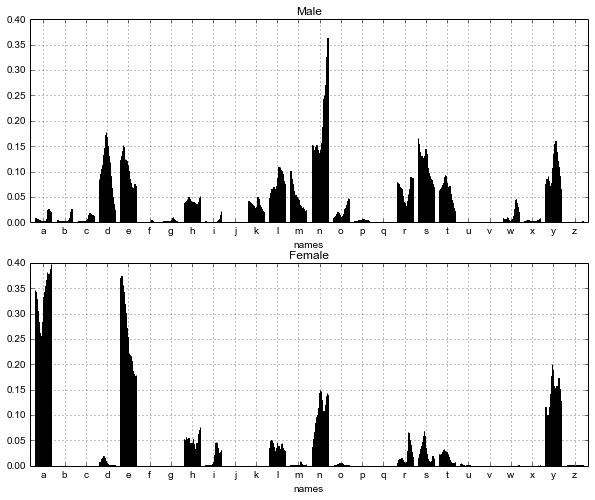

In [152]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize = (10, 8))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male', legend = False)
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Female', legend = False)

In [153]:
plt.subplots_adjust(hspace = 0.25)

In [157]:
letter_prop = table/table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y', 'm'], 'M'].T
dny_ts.head()

,d,n,y,m
year,,,,
1880,0.083055,0.153213,0.075760,0.101907
1881,0.083247,0.153214,0.077451,0.101411
1882,0.085340,0.149560,0.077537,0.099000
1883,0.084066,0.151646,0.079144,0.096663
1884,0.086120,0.149915,0.080405,0.093774


In [158]:
plt.close('all')

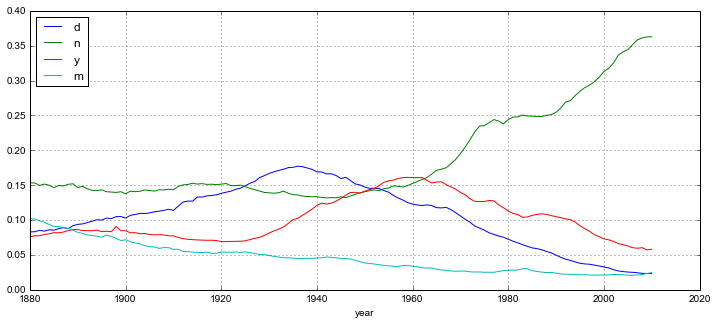

In [159]:
dny_ts.plot()

### boy names that became girls' names (and vice versa)

In [160]:
all_names = top1000.names.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [161]:
filtered = top1000[top1000.names.isin(lesley_like)]
filtered.groupby('names').births.sum()

names
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [163]:
table = filtered.pivot_table('births', rows = 'year', cols = 'sex', aggfunc = sum)
table = table.div(table.sum(1), axis = 0)
table.tail()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
1886,0.055556,0.944444
1887,0.067416,0.932584
1888,0.116162,0.883838


In [164]:
plt.close('all')

In [166]:
table.plot(style = {'M', 'k-', 'F': 'k--'})

SyntaxError: invalid syntax (<ipython-input-166-e72db582d4c7>, line 1)